In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('..')
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve, estimate_parameters
from oasis.plotting import simpleaxis
from oasis.oasis_methods import oasisAR1, oasisAR2

In [3]:
file = 'traces_1645.csv'
with open(file, mode='r', encoding='utf-8') as f:
    lines = f.readlines()
print(len(lines))
data_list = []
for line in lines:
    data_list.append([float(s) for s in line.split(',')])
data = np.asarray(data_list)
print(data.shape)

390
(390, 6365)


In [4]:
dev_traces = []
for d0 in data:
    %time c, s, _, _, _ = deconvolve(d0, penalty=1)
    dev_traces.append(s.tolist())

Wall time: 293 ms
Wall time: 4.99 ms
Wall time: 40.9 ms
Wall time: 8.98 ms
Wall time: 6.97 ms
Wall time: 7.98 ms
Wall time: 6.98 ms
Wall time: 6.98 ms
Wall time: 5.98 ms
Wall time: 6.98 ms
Wall time: 12 ms
Wall time: 4.99 ms
Wall time: 3.99 ms
Wall time: 4.99 ms
Wall time: 3.99 ms
Wall time: 5.98 ms
Wall time: 3.99 ms
Wall time: 5.98 ms
Wall time: 6.98 ms
Wall time: 6.98 ms
Wall time: 5.99 ms
Wall time: 3.99 ms
Wall time: 5.98 ms
Wall time: 8.97 ms
Wall time: 4.98 ms
Wall time: 4.99 ms
Wall time: 5.99 ms
Wall time: 6.98 ms
Wall time: 7.98 ms
Wall time: 4.99 ms
Wall time: 3.99 ms
Wall time: 6.98 ms
Wall time: 6.98 ms
Wall time: 6.98 ms
Wall time: 6.98 ms
Wall time: 4.99 ms
Wall time: 3.99 ms
Wall time: 4.99 ms
Wall time: 5.98 ms
Wall time: 6.98 ms
Wall time: 4.99 ms
Wall time: 5.98 ms
Wall time: 3.99 ms
Wall time: 6.98 ms
Wall time: 3.99 ms
Wall time: 3.99 ms
Wall time: 4.99 ms
Wall time: 3.99 ms
Wall time: 3.99 ms
Wall time: 4.99 ms
Wall time: 5.98 ms
Wall time: 4.99 ms
Wall time: 5.98

In [5]:
len(dev_traces)

390

In [48]:
d0 = data[275]

In [6]:
output = 'dev_traces.csv'
with open(output, 'w') as f:
    for trace in dev_traces:
        f.write(','.join([str(i) for i in trace]))
        f.write('\n')

In [49]:
%time c, s, b, g, lam = deconvolve(d0, penalty=1)

Wall time: 8.98 ms


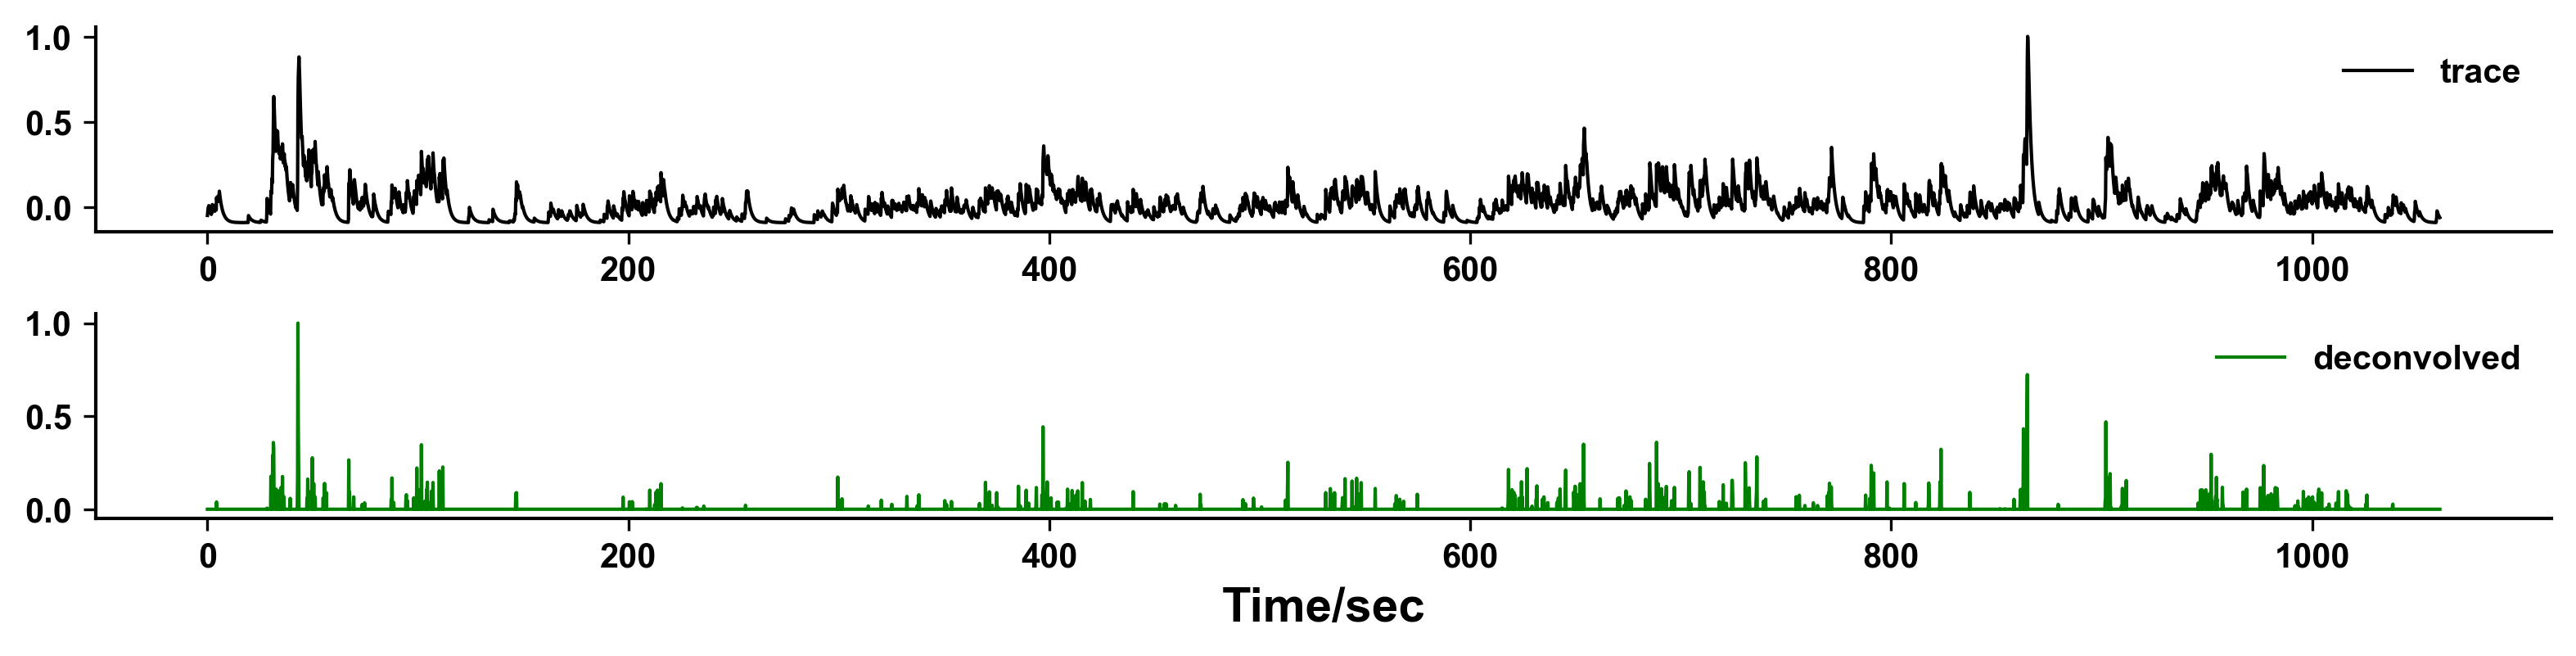

In [50]:
x = np.arange(len(d0))/6

plt.figure()
plt.subplot(211)

plt.plot(x, d0/d0.max(), lw=1, c='k', label='trace')
plt.legend()

plt.subplot(212)

plt.xlabel('Time/sec')
plt.plot(x, s/s.max(), lw=1, c='g' , label='deconvolved')
plt.legend()

In [19]:
from matplotlib import rc
darkmode = 0
facecolor = ['w', '#555555']
line_text_color = ['k', 'w']

rc('lines', linewidth=0.8)
rc('font', family='Arial', weight='bold', size=14)
rc('axes', linewidth=1, labelsize=14, labelweight='bold', titlesize=18,
   titleweight='bold', edgecolor=line_text_color[darkmode], labelcolor=line_text_color[darkmode],
   facecolor=facecolor[darkmode])
rc('axes.spines', right=False, top=False)
rc('legend', framealpha=0.5, fontsize=10, frameon=False)
rc('xtick', top=False, labeltop=False, labelsize=10, color=line_text_color[darkmode])
rc('ytick', right=False, labelright=False, labelsize=10, color=line_text_color[darkmode])
rc('text', color=line_text_color[darkmode])
rc('figure', dpi=300, figsize=(20, 4), facecolor=facecolor[darkmode])
rc('figure.subplot', left=0.3, right=0.8, bottom=0.4, top=0.9, wspace=0.8, hspace=0.4)
# rc('figure.subplot', left=0, right=1, bottom=0, top=1, wspace=0.2, hspace=0.2)
rc('errorbar', capsize=0)
rc('savefig', transparent=True, dpi=300)